# 모델간 RMSE 성능 비교 그래프 그리는 함수 정의

In [1]:
import matplotlib.pyplot as plt

# 공통된 RMSE 값을 처리하는 함수
def get_rmse_values(new_val_rmse, new_test_rmse):
    # Base 모델의 RMSE 값 (상수)
    base_val_rmse = 5022.51
    base_test_rmse = 5010.60

    # 라벨과 RMSE 값 리스트
    labels = ['Validation RMSE', 'Test RMSE']
    base_rmse = [base_val_rmse, base_test_rmse]
    new_rmse = [new_val_rmse, new_test_rmse]

    return labels, base_rmse, new_rmse

# Bar 그래프를 그리는 함수
def plot_rmse_comparison_bar(new_val_rmse, new_test_rmse, model_name="New"):
    labels, base_rmse, new_rmse = get_rmse_values(new_val_rmse, new_test_rmse)

    plt.figure(figsize=(8, 5))

    # Base 모델 (파란색)
    bar_base = plt.bar(labels, base_rmse, color='blue', width=0.3, label='Base Model', align='center')

    # New 모델 (빨간색, 조금 겹치게)
    bar_new = plt.bar([x for x in labels], new_rmse, color='red', width=0.3, label=f'{model_name} Model', align='edge')

    # Bar 그래프 위에 숫자 표시
    for bar in bar_base:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    for bar in bar_new:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.xlabel('RMSE Type')
    plt.ylabel('RMSE Value')
    plt.title(f"""Comparison of [Base] and [{model_name}] Model RMSE (Bar)""")
    plt.legend()
    plt.show()

# Line 그래프를 그리는 함수
def plot_rmse_comparison_line(new_val_rmse, new_test_rmse, model_name="New"):
    labels, base_rmse, new_rmse = get_rmse_values(new_val_rmse, new_test_rmse)

    plt.figure(figsize=(8, 5))

    # Base Model - 파란색
    plt.plot(labels, base_rmse, label='Base Model', color='blue', marker='o')

    # New Model - 빨간색
    plt.plot(labels, new_rmse, label=f'{model_name} Model', color='red', marker='o')

    # Line 그래프 위에 숫자 표시
    for i, txt in enumerate(base_rmse):
        plt.text(labels[i], base_rmse[i], round(base_rmse[i], 2), ha='center', va='bottom', color='blue')

    for i, txt in enumerate(new_rmse):
        plt.text(labels[i], new_rmse[i], round(new_rmse[i], 2), ha='center', va='bottom', color='red')

    plt.xlabel('RMSE Type')
    plt.ylabel('RMSE Value')
    plt.title(f"""Comparison of [Base] and [{model_name}] Model RMSE (Line)""")
    plt.legend()
    plt.show()

# 두 그래프 모두 출력하는 함수
def plot_show_all(new_val_rmse, new_test_rmse, model_name="New"):
    plot_rmse_comparison_bar(new_val_rmse, new_test_rmse, model_name)
    plot_rmse_comparison_line(new_val_rmse, new_test_rmse, model_name)

# 함수 실행 예시
# plot_show_all(new_val_rmse, new_test_rmse, "____")
# plot_show_all(4990.67, 5015.82, "____")


# `train.csv`로 학습한 `기본 모델` (2024.10.8 2:20)
- 모델명: LinearRegression
- 성능 평가: RMSE
  - Validation RMSE: 5022.51
  - Test RMSE: 5010.60
## 코드 참조: `default_model.ipynb`

=== 데이터 타입 확인 ===
transaction_id              int64
apartment_id                int64
city                       object
dong                       object
jibun                      object
apt                        object
addr_kr                    object
exclusive_use_area        float64
year_of_completion          int64
transaction_year_month      int64
transaction_date           object
floor                       int64
transaction_real_price      int64
dtype: object

=== train_df.info() ===
<class 'pandas.core.frame.DataFrame'>
Index: 1216553 entries, 1111339 to 532104
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5 

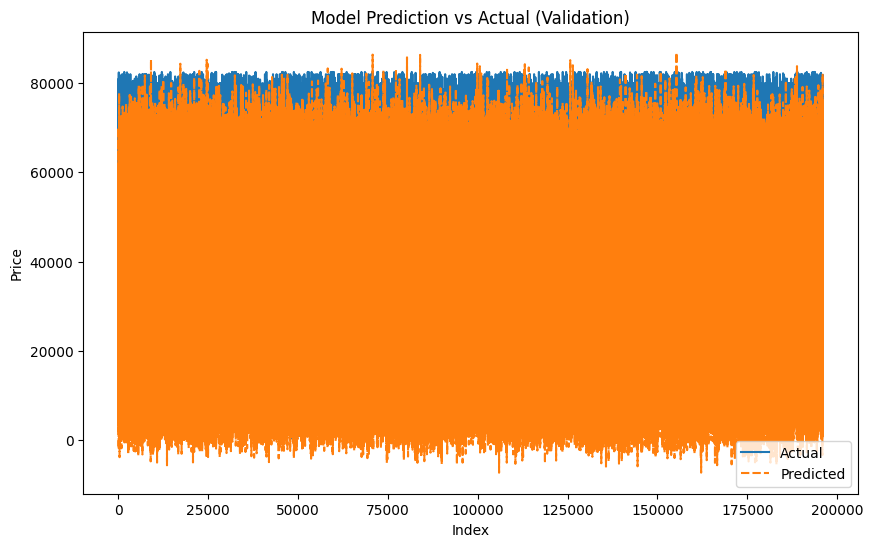

In [2]:
# 패키지/라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 데이터 불러오기
df = pd.read_csv("../../dataset/train.csv", encoding="utf-8")

# 데이터 타입 확인
print("=== 데이터 타입 확인 ===")
print(df.dtypes)

# 데이터 샘플링 (전체 데이터 사용)
# train_df = df.copy()  # 전체 데이터를 사용합니다.
# train_df = df.sample(frac=0.01, random_state=2024) # 1% 만 사용해서 빠르게 학습
train_df = df.sample(frac=1, random_state=2024)  # 100% 전부 사용

# 데이터 분석하기
print("\n=== train_df.info() ===")
train_df.info()

print("\n=== train_df.head() ===")
train_df.head(3)

# 1. transaction_year_month에서 '년', '월' 분리
if "transaction_year_month" in train_df.columns:
    train_df["transaction_year"] = train_df["transaction_year_month"] // 100
    train_df["transaction_month"] = train_df["transaction_year_month"] % 100


# 2. 필요없는 컬럼 제거
train_df = train_df.drop(
    [
        "transaction_id",  # 제거 (단순 식별자)
        "jibun",  # 제거 (너무 세부적인 위치 정보)
        "addr_kr",  # 제거 (중복 정보)
        "transaction_year_month",  # 이미 연도와 월로 분리함
        "transaction_date",  # 제거 (유의미하지 않음)
    ],
    axis=1,
    errors="ignore",
)


# 3-1. 결측치 처리
print("\n=== 결측치 확인 ===")
missing_values = train_df.isnull().sum()
print(missing_values)

# 결측치가 포함된 행을 전부 제거
#
# 왜냐기본 train.csv 자체가 결측치가 없었음.
# 새로 생긴 결측치는 csv 파일 처리 과정에서 생긴 결측치로서 매우 소량임을 확인 완료.
train_df = train_df.dropna()

# 결측치를 평균 또는 중앙값으로 대체하는 경우
# train_df.fillna(train_df.mean(), inplace=True)


# 3-2. 이상치 처리 (사분위 범위(IQR)를 이용한 방법)

# floor 열에서 음수 값 제거 (지하층 제거)
train_df = train_df[train_df["floor"] >= 0]

# 수치형 피처만 선택
numeric_columns = train_df.select_dtypes(include=[np.number]).columns

# 각 피처별 IQR을 기반으로 이상치 제거
for column in numeric_columns:
    Q1 = train_df[column].quantile(0.25)  # 1사분위
    Q3 = train_df[column].quantile(0.75)  # 3사분위
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 이상치 하한
    upper_bound = Q3 + 1.5 * IQR  # 이상치 상한

    # 이상치가 범위를 벗어난 값들을 제거
    train_df = train_df[
        (train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)
    ]

print("\n=== 이상치 처리 완료 후 데이터프레임 정보 ===")
train_df.info()


# 4. 데이터 타입 변환 및 범주형 변수 처리


# 4-1. 'city' 컬럼 처리 (타깃 인코딩)
print("\n=== 'city' 컬럼의 고유값 수 ===")
print(train_df["city"].nunique())

# 'city' 컬럼에 대한 타깃 인코딩 적용
city_mean_price = train_df.groupby("city")["transaction_real_price"].mean()
train_df["city_encoded"] = train_df["city"].map(city_mean_price)
train_df = train_df.drop("city", axis=1)


# 4-2. 'dong' 컬럼 처리 (타깃 인코딩)
print("\n=== 'dong' 컬럼의 고유값 수 ===")
print(train_df["dong"].nunique())

# 'dong' 컬럼에 대한 타깃 인코딩 적용
dong_mean_price = train_df.groupby("dong")["transaction_real_price"].mean()
train_df["dong_encoded"] = train_df["dong"].map(dong_mean_price)
train_df = train_df.drop("dong", axis=1)


# 4-3. 'apt' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apt' 컬럼의 고유값 수 ===")
print(train_df["apt"].nunique())

# 괄호와 괄호 안 내용 제거
regex = r"\(.*\)|\s-\s.*"
train_df["apt"] = train_df["apt"].apply(lambda x: re.sub(regex, "", x))

print("\n=== 'apt' 컬럼의 괄호 내용 제거 후 고유값 수 ===")
print(train_df["apt"].nunique())

# 'apt' 컬럼에 대한 타깃 인코딩 적용
apt_mean_price = train_df.groupby("apt")["transaction_real_price"].mean()
train_df["apt_encoded"] = train_df["apt"].map(apt_mean_price)
train_df = train_df.drop("apt", axis=1)


# 4-4. 'apartment_id' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apartment_id' 컬럼의 고유값 수 ===")
print(train_df["apartment_id"].nunique())

# 'apartment_id' 컬럼에 대한 타깃 인코딩 적용
apartment_id_mean_price = train_df.groupby("apartment_id")[
    "transaction_real_price"
].mean()
train_df["apartment_id_encoded"] = train_df["apartment_id"].map(
    apartment_id_mean_price
)
train_df = train_df.drop("apartment_id", axis=1)


# 5. 데이터 분리 (Feature와 Target 나누기)
X = train_df.drop("transaction_real_price", axis=1)
y = train_df["transaction_real_price"]

# 데이터 정보 출력
print("\n=== X.info() ===")
X.info()
print("\n=== X.head() ===")
print(X.head())
print("\n=== y.describe() ===")
print(y.describe())


# 6-1. 데이터 분할: train + validation(75%), test(25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2024
)


# 6-2. 데이터 분할: train(75%), validation(25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=2024
)


# 7. 피처 스케일링 (StandardScaler 사용)
scaler = StandardScaler()

# 수치형 변수 선택 (스케일링 대상)
numeric_features = X_train.select_dtypes(include=[np.number]).columns
print("\n=== 스케일링 대상 수치형 피처 ===")
print(numeric_features)

# X_train, X_val, X_test 각각에 대해 스케일링 적용
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# y 값은 스케일링하지 않음


# 8. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 9. Validation 세트로 예측 및 RMSE 계산
y_val_pred = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"\nValidation RMSE: {val_rmse:.2f}")


# 10. Test 세트로 예측 및 RMSE 계산
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.2f}")


# 11. 모델 디버깅용 출력
# X_train, X_val 스케일링 후 값 확인
print("\n=== X_train 스케일링 후 값 (첫 5개) ===")
print(X_train.head())

print("\n=== X_val 스케일링 후 값 (첫 5개) ===")
print(X_val.head())

# y_val 실제 값 범위 확인
print("\n=== y_val 실제 값 범위 ===")
print(f"Min: {y_val.min()}, Max: {y_val.max()}")

# y_val_pred 예측 값 범위 확인
print("\n=== y_val_pred 예측 값 범위 ===")
print(f"Min: {y_val_pred.min()}, Max: {y_val_pred.max()}")

# 모델 회귀 계수 확인
print("\n=== 모델 회귀 계수 ===")
print(pd.Series(model.coef_, index=X_train.columns))


# 12. 시각화 함수 정의 및 적용
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=pd.DataFrame(
            {"Actual": y_true.reset_index(drop=True), "Predicted": y_pred}
        )
    )
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


# 13. 검증 세트 결과 시각화
plot_results(y_val, y_val_pred, "Model Prediction vs Actual (Validation)")


# `train_add__gu.csv`로 학습한 `새 모델`
- 모델명: LinearRegression
- 성능 평가: RMSE
  - Validation RMSE: 4990.67
  - Test RMSE: 5015.82
- 가설 제안
  - '구'를 추가하면 미세하게라도 혹시나 유의미한 지표 개선이 되지 않을까?!
- 가설 검증 결과
  - 거의 아무 영향 없음.

- `기본 모델`과의 차이점 (코드에 주석으로 💡표시)
  - `train.csv`에 있는 시(`city`)/동(`dong`) 으로부터 구(`gu`) 열을 추가하였음.
    - `국토교통부_전국 법정동_20240802.csv` 파일에서 구 정보 추출.

- 의의
  - 후에 `park.csv`로부터 `park_area_avg_by_gu`열을 추출하기 위한 준비 단계.
  - 후에 `day_care_center.csv`로부터 `day_care_count`열을 추출하기 위한 준비 단계.

- 주의/한계
  - `gu` 결측치 483개 있음!
    - 사유: 국토교통부.csv에 `삭제일자`가 있는 모든 행을 지워버렸으나, 결측된 구들은 `삭제일자` 이후로 새로운 구로 편입되지 않았음.
      - 즉, `등록 일자` ~ `삭제 일자` 사이에 `건설 일자`가 끼어있음.
      - 추가 처리를 하여 결측치를 0으로 만들 수는 있겠으나, 시간이 부족하므로 보류.

=== 데이터 타입 확인 ===
transaction_id              int64
apartment_id                int64
city                       object
gu                         object
dong                       object
jibun                      object
apt                        object
addr_kr                    object
exclusive_use_area        float64
year_of_completion          int64
transaction_year_month      int64
transaction_date           object
floor                       int64
transaction_real_price      int64
dtype: object

=== train_df.info() ===
<class 'pandas.core.frame.DataFrame'>
Index: 800704 entries, 146276 to 532104
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          800704 non-null  int64  
 1   apartment_id            800704 non-null  int64  
 2   city                    800704 non-null  object 
 3   gu                      800704 non-null  object 
 4   dong                    800

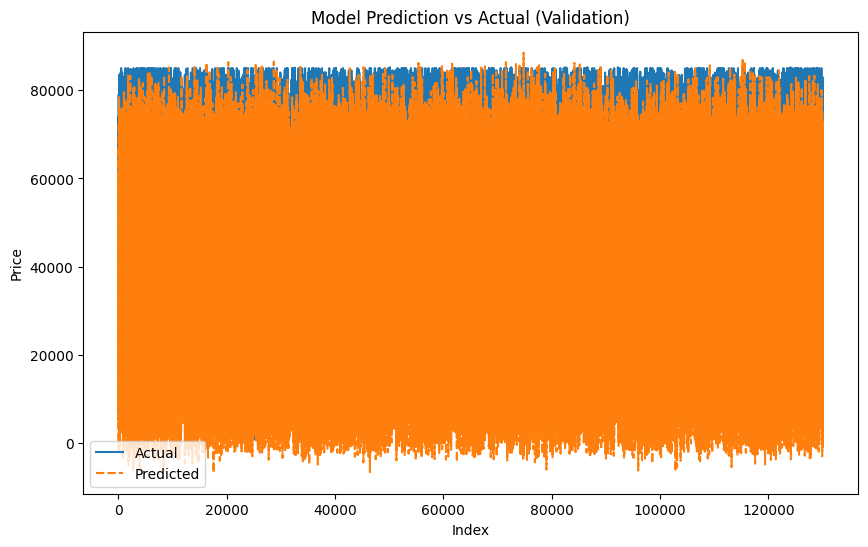

In [3]:
# 패키지/라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 데이터 불러오기
# 💡 'gu' 열 추가
df = pd.read_csv("../../dataset/train_add__gu.csv", encoding="utf-8")

# 데이터 타입 확인
print("=== 데이터 타입 확인 ===")
print(df.dtypes)

# 데이터 샘플링 (전체 데이터 사용)
# train_df = df.copy()  # 전체 데이터를 사용합니다.
# train_df = df.sample(frac=0.01, random_state=2024) # 1% 만 사용해서 빠르게 학습
train_df = df.sample(frac=1, random_state=2024)  # 100% 전부 사용

# 데이터 분석하기
print("\n=== train_df.info() ===")
train_df.info()

print("\n=== train_df.head() ===")
train_df.head(3)

# 1. transaction_year_month에서 '년', '월' 분리
if "transaction_year_month" in train_df.columns:
    train_df["transaction_year"] = train_df["transaction_year_month"] // 100
    train_df["transaction_month"] = train_df["transaction_year_month"] % 100


# 2. 필요없는 컬럼 제거
train_df = train_df.drop(
    [
        "transaction_id",  # 제거 (단순 식별자)
        "jibun",  # 제거 (너무 세부적인 위치 정보)
        "addr_kr",  # 제거 (중복 정보)
        "transaction_year_month",  # 이미 연도와 월로 분리함
        "transaction_date",  # 제거 (유의미하지 않음)
    ],
    axis=1,
    errors="ignore",
)


# 3-1. 결측치 처리
print("\n=== 결측치 확인 ===")
missing_values = train_df.isnull().sum()
print(missing_values)

# 결측치가 포함된 행을 전부 제거
#
# 왜냐기본 train.csv 자체가 결측치가 없었음.
# 새로 생긴 결측치는 csv 파일 처리 과정에서 생긴 결측치로서 매우 소량임을 확인 완료.
train_df = train_df.dropna()

# 결측치를 평균 또는 중앙값으로 대체하는 경우
# train_df.fillna(train_df.mean(), inplace=True)


# 3-2. 이상치 처리 (사분위 범위(IQR)를 이용한 방법)

# floor 열에서 음수 값 제거 (지하층 제거)
train_df = train_df[train_df["floor"] >= 0]

# 수치형 피처만 선택
numeric_columns = train_df.select_dtypes(include=[np.number]).columns

# 각 피처별 IQR을 기반으로 이상치 제거
for column in numeric_columns:
    Q1 = train_df[column].quantile(0.25)  # 1사분위
    Q3 = train_df[column].quantile(0.75)  # 3사분위
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 이상치 하한
    upper_bound = Q3 + 1.5 * IQR  # 이상치 상한

    # 이상치가 범위를 벗어난 값들을 제거
    train_df = train_df[
        (train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)
    ]

print("\n=== 이상치 처리 완료 후 데이터프레임 정보 ===")
train_df.info()


# 4. 데이터 타입 변환 및 범주형 변수 처리


# 4-1. 'city' 컬럼 처리 (타깃 인코딩)
print("\n=== 'city' 컬럼의 고유값 수 ===")
print(train_df["city"].nunique())

# 'city' 컬럼에 대한 타깃 인코딩 적용
city_mean_price = train_df.groupby("city")["transaction_real_price"].mean()
train_df["city_encoded"] = train_df["city"].map(city_mean_price)
train_df = train_df.drop("city", axis=1)

# 💡. 'gu' 컬럼 처리 (타깃 인코딩)
print("\n=== 'gu' 컬럼의 고유값 수 ===")
print(train_df["gu"].nunique())

# 'gu' 컬럼에 대한 타깃 인코딩 적용
gu_mean_price = train_df.groupby("gu")["transaction_real_price"].mean()
train_df["gu_encoded"] = train_df["gu"].map(gu_mean_price)
train_df = train_df.drop("gu", axis=1)


# 4-2. 'dong' 컬럼 처리 (타깃 인코딩)
print("\n=== 'dong' 컬럼의 고유값 수 ===")
print(train_df["dong"].nunique())

# 'dong' 컬럼에 대한 타깃 인코딩 적용
dong_mean_price = train_df.groupby("dong")["transaction_real_price"].mean()
train_df["dong_encoded"] = train_df["dong"].map(dong_mean_price)
train_df = train_df.drop("dong", axis=1)


# 4-3. 'apt' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apt' 컬럼의 고유값 수 ===")
print(train_df["apt"].nunique())

# 괄호와 괄호 안 내용 제거
regex = r"\(.*\)|\s-\s.*"
train_df["apt"] = train_df["apt"].apply(lambda x: re.sub(regex, "", x))

print("\n=== 'apt' 컬럼의 괄호 내용 제거 후 고유값 수 ===")
print(train_df["apt"].nunique())

# 'apt' 컬럼에 대한 타깃 인코딩 적용
apt_mean_price = train_df.groupby("apt")["transaction_real_price"].mean()
train_df["apt_encoded"] = train_df["apt"].map(apt_mean_price)
train_df = train_df.drop("apt", axis=1)


# 4-4. 'apartment_id' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apartment_id' 컬럼의 고유값 수 ===")
print(train_df["apartment_id"].nunique())

# 'apartment_id' 컬럼에 대한 타깃 인코딩 적용
apartment_id_mean_price = train_df.groupby("apartment_id")[
    "transaction_real_price"
].mean()
train_df["apartment_id_encoded"] = train_df["apartment_id"].map(
    apartment_id_mean_price
)
train_df = train_df.drop("apartment_id", axis=1)


# 5. 데이터 분리 (Feature와 Target 나누기)
X = train_df.drop("transaction_real_price", axis=1)
y = train_df["transaction_real_price"]

# 데이터 정보 출력
print("\n=== X.info() ===")
X.info()
print("\n=== X.head() ===")
print(X.head())
print("\n=== y.describe() ===")
print(y.describe())


# 6-1. 데이터 분할: train + validation(75%), test(25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2024
)


# 6-2. 데이터 분할: train(75%), validation(25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=2024
)


# 7. 피처 스케일링 (StandardScaler 사용)
scaler = StandardScaler()

# 수치형 변수 선택 (스케일링 대상)
numeric_features = X_train.select_dtypes(include=[np.number]).columns
print("\n=== 스케일링 대상 수치형 피처 ===")
print(numeric_features)

# X_train, X_val, X_test 각각에 대해 스케일링 적용
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# y 값은 스케일링하지 않음


# 8. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 9. Validation 세트로 예측 및 RMSE 계산
y_val_pred = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"\nValidation RMSE: {val_rmse:.2f}")


# 10. Test 세트로 예측 및 RMSE 계산
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.2f}")


# 11. 모델 디버깅용 출력
# X_train, X_val 스케일링 후 값 확인
print("\n=== X_train 스케일링 후 값 (첫 5개) ===")
print(X_train.head())

print("\n=== X_val 스케일링 후 값 (첫 5개) ===")
print(X_val.head())

# y_val 실제 값 범위 확인
print("\n=== y_val 실제 값 범위 ===")
print(f"Min: {y_val.min()}, Max: {y_val.max()}")

# y_val_pred 예측 값 범위 확인
print("\n=== y_val_pred 예측 값 범위 ===")
print(f"Min: {y_val_pred.min()}, Max: {y_val_pred.max()}")

# 모델 회귀 계수 확인
print("\n=== 모델 회귀 계수 ===")
print(pd.Series(model.coef_, index=X_train.columns))


# 12. 시각화 함수 정의 및 적용
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=pd.DataFrame(
            {"Actual": y_true.reset_index(drop=True), "Predicted": y_pred}
        )
    )
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


# 13. 검증 세트 결과 시각화
plot_results(y_val, y_val_pred, "Model Prediction vs Actual (Validation)")

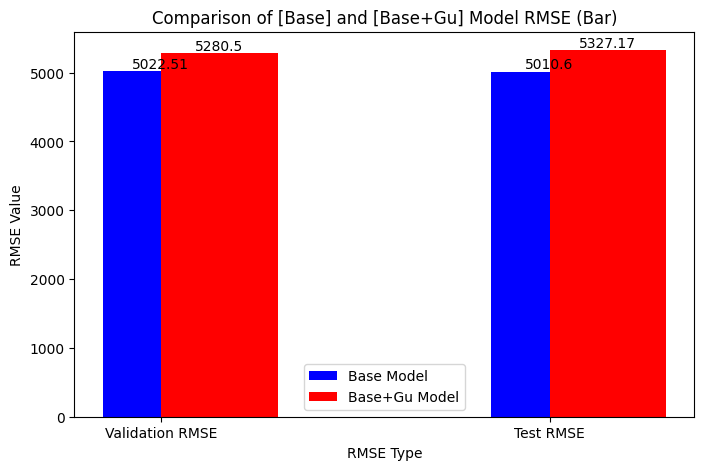

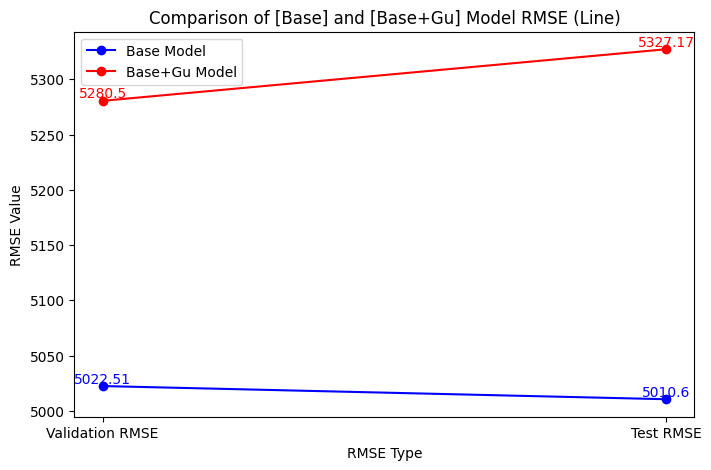

In [4]:
plot_show_all(val_rmse, test_rmse, "Base+Gu")


# `train_add__gu__park.csv`로 학습한 `새 모델`
- 모델명: LinearRegression
- 성능 평가: RMSE
  - Validation RMSE: 
  - Test RMSE: 

- 가설 제안
  - '구'를 추가하면 미세하게라도 혹시나 유의미한 지표 개선이 되지 않을까?!

- 가설 검증 결과
  - 거의 아무 영향 없음.

- `기본 모델`과의 차이점 (코드에 주석으로 💡표시)

- 의의

- 주의/한계


=== 데이터 타입 확인 ===
transaction_id              int64
apartment_id                int64
city                       object
gu                         object
dong                       object
park_area_avg_by_gu         int64
jibun                      object
apt                        object
addr_kr                    object
exclusive_use_area        float64
year_of_completion          int64
transaction_year_month      int64
transaction_date           object
floor                       int64
transaction_real_price      int64
dtype: object

=== train_df.info() ===
<class 'pandas.core.frame.DataFrame'>
Index: 673266 entries, 32927 to 532104
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          673266 non-null  int64  
 1   apartment_id            673266 non-null  int64  
 2   city                    673266 non-null  object 
 3   gu                      673266 non-null  object 

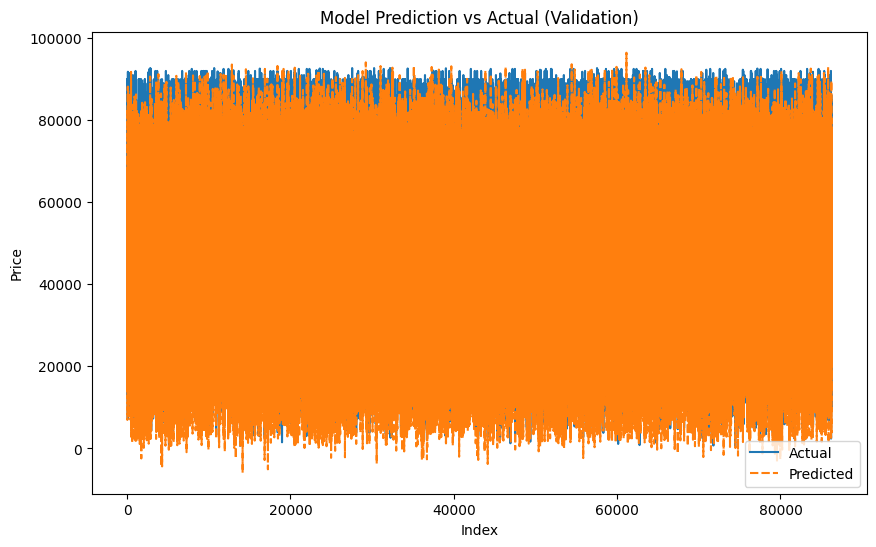

In [5]:
# 패키지/라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 데이터 불러오기
# 💡 'gu', 'park' 열 추가
df = pd.read_csv("../../dataset/train_add__gu__park.csv", encoding="utf-8")

# 데이터 타입 확인
print("=== 데이터 타입 확인 ===")
print(df.dtypes)

# 데이터 샘플링 (전체 데이터 사용)
# train_df = df.copy()  # 전체 데이터를 사용합니다.
# train_df = df.sample(frac=0.01, random_state=2024) # 1% 만 사용해서 빠르게 학습
train_df = df.sample(frac=1, random_state=2024)  # 100% 전부 사용

# 데이터 분석하기
print("\n=== train_df.info() ===")
train_df.info()

print("\n=== train_df.head() ===")
train_df.head(3)

# 1. transaction_year_month에서 '년', '월' 분리
if "transaction_year_month" in train_df.columns:
    train_df["transaction_year"] = train_df["transaction_year_month"] // 100
    train_df["transaction_month"] = train_df["transaction_year_month"] % 100


# 2. 필요없는 컬럼 제거
train_df = train_df.drop(
    [
        "transaction_id",  # 제거 (단순 식별자)
        "jibun",  # 제거 (너무 세부적인 위치 정보)
        "addr_kr",  # 제거 (중복 정보)
        "transaction_year_month",  # 이미 연도와 월로 분리함
        "transaction_date",  # 제거 (유의미하지 않음)
    ],
    axis=1,
    errors="ignore",
)


# 3-1. 결측치 처리
print("\n=== 결측치 확인 ===")
missing_values = train_df.isnull().sum()
print(missing_values)

# 결측치가 포함된 행을 전부 제거
#
# 왜냐기본 train.csv 자체가 결측치가 없었음.
# 새로 생긴 결측치는 csv 파일 처리 과정에서 생긴 결측치로서 매우 소량임을 확인 완료.
train_df = train_df.dropna()

# 결측치를 평균 또는 중앙값으로 대체하는 경우
# train_df.fillna(train_df.mean(), inplace=True)


# 3-2. 이상치 처리 (사분위 범위(IQR)를 이용한 방법)

# floor 열에서 음수 값 제거 (지하층 제거)
train_df = train_df[train_df["floor"] >= 0]

# 수치형 피처만 선택
numeric_columns = train_df.select_dtypes(include=[np.number]).columns

# 각 피처별 IQR을 기반으로 이상치 제거
for column in numeric_columns:
    Q1 = train_df[column].quantile(0.25)  # 1사분위
    Q3 = train_df[column].quantile(0.75)  # 3사분위
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 이상치 하한
    upper_bound = Q3 + 1.5 * IQR  # 이상치 상한

    # 이상치가 범위를 벗어난 값들을 제거
    train_df = train_df[
        (train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)
    ]

print("\n=== 이상치 처리 완료 후 데이터프레임 정보 ===")
train_df.info()


# 4. 데이터 타입 변환 및 범주형 변수 처리


# 4-1. 'city' 컬럼 처리 (타깃 인코딩)
print("\n=== 'city' 컬럼의 고유값 수 ===")
print(train_df["city"].nunique())

# 'city' 컬럼에 대한 타깃 인코딩 적용
city_mean_price = train_df.groupby("city")["transaction_real_price"].mean()
train_df["city_encoded"] = train_df["city"].map(city_mean_price)
train_df = train_df.drop("city", axis=1)

# 💡. 'gu' 컬럼 처리 (타깃 인코딩)
print("\n=== 'gu' 컬럼의 고유값 수 ===")
print(train_df["gu"].nunique())

# 'gu' 컬럼에 대한 타깃 인코딩 적용
gu_mean_price = train_df.groupby("gu")["transaction_real_price"].mean()
train_df["gu_encoded"] = train_df["gu"].map(gu_mean_price)
train_df = train_df.drop("gu", axis=1)


# 4-2. 'dong' 컬럼 처리 (타깃 인코딩)
print("\n=== 'dong' 컬럼의 고유값 수 ===")
print(train_df["dong"].nunique())

# 'dong' 컬럼에 대한 타깃 인코딩 적용
dong_mean_price = train_df.groupby("dong")["transaction_real_price"].mean()
train_df["dong_encoded"] = train_df["dong"].map(dong_mean_price)
train_df = train_df.drop("dong", axis=1)


# 4-3. 'apt' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apt' 컬럼의 고유값 수 ===")
print(train_df["apt"].nunique())

# 괄호와 괄호 안 내용 제거
regex = r"\(.*\)|\s-\s.*"
train_df["apt"] = train_df["apt"].apply(lambda x: re.sub(regex, "", x))

print("\n=== 'apt' 컬럼의 괄호 내용 제거 후 고유값 수 ===")
print(train_df["apt"].nunique())

# 'apt' 컬럼에 대한 타깃 인코딩 적용
apt_mean_price = train_df.groupby("apt")["transaction_real_price"].mean()
train_df["apt_encoded"] = train_df["apt"].map(apt_mean_price)
train_df = train_df.drop("apt", axis=1)


# 4-4. 'apartment_id' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apartment_id' 컬럼의 고유값 수 ===")
print(train_df["apartment_id"].nunique())

# 'apartment_id' 컬럼에 대한 타깃 인코딩 적용
apartment_id_mean_price = train_df.groupby("apartment_id")[
    "transaction_real_price"
].mean()
train_df["apartment_id_encoded"] = train_df["apartment_id"].map(
    apartment_id_mean_price
)
train_df = train_df.drop("apartment_id", axis=1)


# 5. 데이터 분리 (Feature와 Target 나누기)
X = train_df.drop("transaction_real_price", axis=1)
y = train_df["transaction_real_price"]

# 데이터 정보 출력
print("\n=== X.info() ===")
X.info()
print("\n=== X.head() ===")
print(X.head())
print("\n=== y.describe() ===")
print(y.describe())


# 6-1. 데이터 분할: train + validation(75%), test(25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2024
)


# 6-2. 데이터 분할: train(75%), validation(25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=2024
)


# 7. 피처 스케일링 (StandardScaler 사용)
scaler = StandardScaler()

# 수치형 변수 선택 (스케일링 대상)
numeric_features = X_train.select_dtypes(include=[np.number]).columns
print("\n=== 스케일링 대상 수치형 피처 ===")
print(numeric_features)

# X_train, X_val, X_test 각각에 대해 스케일링 적용
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# y 값은 스케일링하지 않음


# 8. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 9. Validation 세트로 예측 및 RMSE 계산
y_val_pred = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"\nValidation RMSE: {val_rmse:.2f}")


# 10. Test 세트로 예측 및 RMSE 계산
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.2f}")


# 11. 모델 디버깅용 출력
# X_train, X_val 스케일링 후 값 확인
print("\n=== X_train 스케일링 후 값 (첫 5개) ===")
print(X_train.head())

print("\n=== X_val 스케일링 후 값 (첫 5개) ===")
print(X_val.head())

# y_val 실제 값 범위 확인
print("\n=== y_val 실제 값 범위 ===")
print(f"Min: {y_val.min()}, Max: {y_val.max()}")

# y_val_pred 예측 값 범위 확인
print("\n=== y_val_pred 예측 값 범위 ===")
print(f"Min: {y_val_pred.min()}, Max: {y_val_pred.max()}")

# 모델 회귀 계수 확인
print("\n=== 모델 회귀 계수 ===")
print(pd.Series(model.coef_, index=X_train.columns))


# 12. 시각화 함수 정의 및 적용
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=pd.DataFrame(
            {"Actual": y_true.reset_index(drop=True), "Predicted": y_pred}
        )
    )
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


# 13. 검증 세트 결과 시각화
plot_results(y_val, y_val_pred, "Model Prediction vs Actual (Validation)")

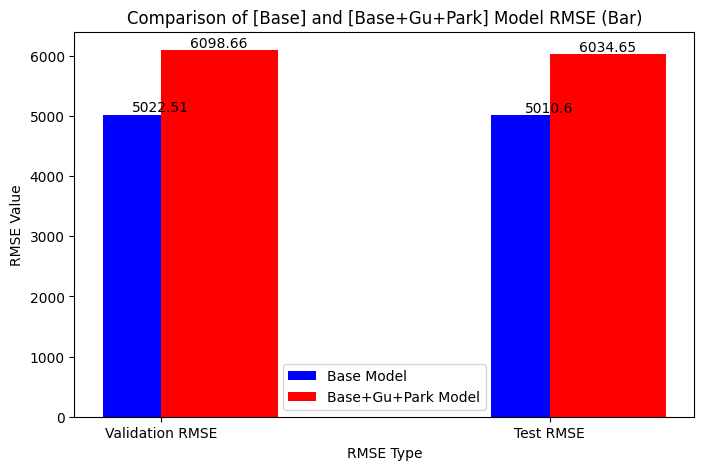

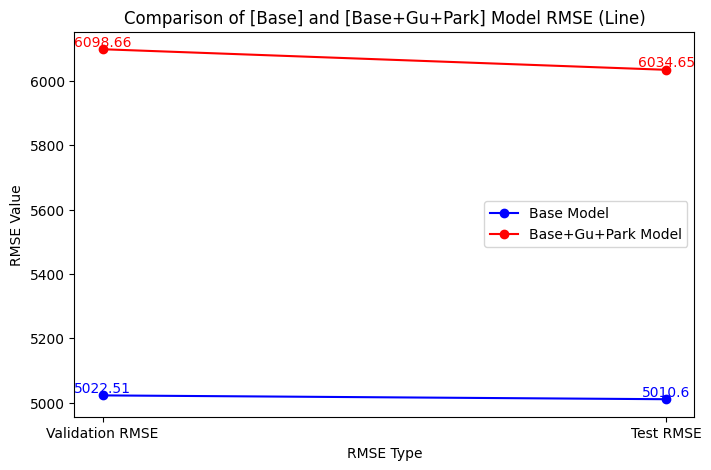

In [6]:
plot_show_all(val_rmse, test_rmse, "Base+Gu+Park")


# `train_add__gu__park__day_care_center.csv`로 학습한 `새 모델`
- 모델명: LinearRegression
- 성능 평가: RMSE
  - Validation RMSE: 
  - Test RMSE: 

- 가설 제안
  - '구'를 추가하면 미세하게라도 혹시나 유의미한 지표 개선이 되지 않을까?!

- 가설 검증 결과
  - 거의 아무 영향 없음.

- `기본 모델`과의 차이점 (코드에 주석으로 💡표시)

- 의의

- 주의/한계


=== 데이터 타입 확인 ===
transaction_id              int64
apartment_id                int64
city                       object
gu                         object
dong                       object
park_area_avg_by_gu         int64
day_care_count              int64
jibun                      object
apt                        object
addr_kr                    object
exclusive_use_area        float64
year_of_completion          int64
transaction_year_month      int64
transaction_date           object
floor                       int64
transaction_real_price      int64
dtype: object

=== train_df.info() ===
<class 'pandas.core.frame.DataFrame'>
Index: 1216553 entries, 1111339 to 532104
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   gu    

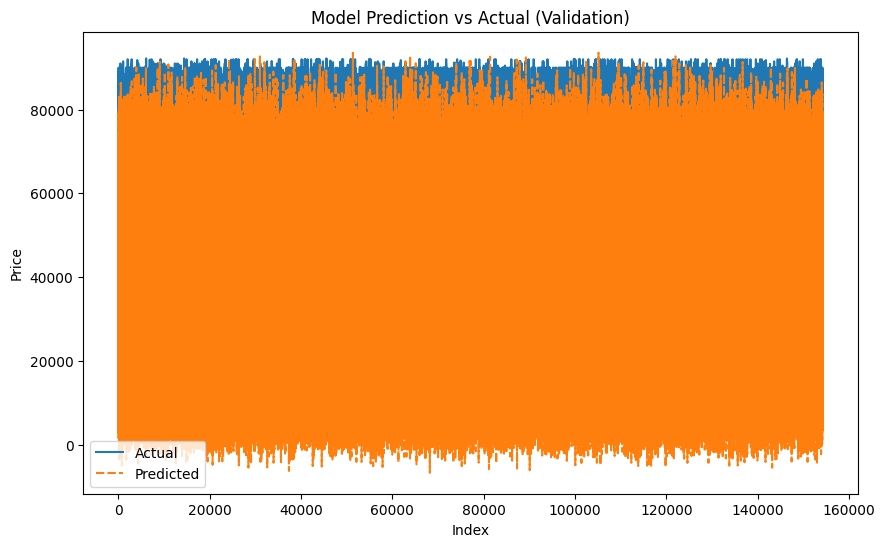

In [7]:
# 패키지/라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 데이터 불러오기
# 💡 'gu', 'park' 열 추가
df = pd.read_csv("../../dataset/train_add__gu__park__day_care_count.csv", encoding="utf-8")

# 데이터 타입 확인
print("=== 데이터 타입 확인 ===")
print(df.dtypes)

# 데이터 샘플링 (전체 데이터 사용)
# train_df = df.copy()  # 전체 데이터를 사용합니다.
# train_df = df.sample(frac=0.01, random_state=2024) # 1% 만 사용해서 빠르게 학습
train_df = df.sample(frac=1, random_state=2024)  # 100% 전부 사용

# 데이터 분석하기
print("\n=== train_df.info() ===")
train_df.info()

print("\n=== train_df.head() ===")
train_df.head(3)

# 1. transaction_year_month에서 '년', '월' 분리
if "transaction_year_month" in train_df.columns:
    train_df["transaction_year"] = train_df["transaction_year_month"] // 100
    train_df["transaction_month"] = train_df["transaction_year_month"] % 100


# 2. 필요없는 컬럼 제거
train_df = train_df.drop(
    [
        "transaction_id",  # 제거 (단순 식별자)
        "jibun",  # 제거 (너무 세부적인 위치 정보)
        "addr_kr",  # 제거 (중복 정보)
        "transaction_year_month",  # 이미 연도와 월로 분리함
        "transaction_date",  # 제거 (유의미하지 않음)
    ],
    axis=1,
    errors="ignore",
)


# 3-1. 결측치 처리
print("\n=== 결측치 확인 ===")
missing_values = train_df.isnull().sum()
print(missing_values)

# 결측치가 포함된 행을 전부 제거
#
# 왜냐기본 train.csv 자체가 결측치가 없었음.
# 새로 생긴 결측치는 csv 파일 처리 과정에서 생긴 결측치로서 매우 소량임을 확인 완료.
train_df = train_df.dropna()

# 결측치를 평균 또는 중앙값으로 대체하는 경우
# train_df.fillna(train_df.mean(), inplace=True)


# 3-2. 이상치 처리 (사분위 범위(IQR)를 이용한 방법)

# floor 열에서 음수 값 제거 (지하층 제거)
train_df = train_df[train_df["floor"] >= 0]

# 수치형 피처만 선택
numeric_columns = train_df.select_dtypes(include=[np.number]).columns

# 각 피처별 IQR을 기반으로 이상치 제거
for column in numeric_columns:
    Q1 = train_df[column].quantile(0.25)  # 1사분위
    Q3 = train_df[column].quantile(0.75)  # 3사분위
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 이상치 하한
    upper_bound = Q3 + 1.5 * IQR  # 이상치 상한

    # 이상치가 범위를 벗어난 값들을 제거
    train_df = train_df[
        (train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)
    ]

print("\n=== 이상치 처리 완료 후 데이터프레임 정보 ===")
train_df.info()


# 4. 데이터 타입 변환 및 범주형 변수 처리


# 4-1. 'city' 컬럼 처리 (타깃 인코딩)
print("\n=== 'city' 컬럼의 고유값 수 ===")
print(train_df["city"].nunique())

# 'city' 컬럼에 대한 타깃 인코딩 적용
city_mean_price = train_df.groupby("city")["transaction_real_price"].mean()
train_df["city_encoded"] = train_df["city"].map(city_mean_price)
train_df = train_df.drop("city", axis=1)

# 💡. 'gu' 컬럼 처리 (타깃 인코딩)
print("\n=== 'gu' 컬럼의 고유값 수 ===")
print(train_df["gu"].nunique())

# 'gu' 컬럼에 대한 타깃 인코딩 적용
gu_mean_price = train_df.groupby("gu")["transaction_real_price"].mean()
train_df["gu_encoded"] = train_df["gu"].map(gu_mean_price)
train_df = train_df.drop("gu", axis=1)


# 4-2. 'dong' 컬럼 처리 (타깃 인코딩)
print("\n=== 'dong' 컬럼의 고유값 수 ===")
print(train_df["dong"].nunique())

# 'dong' 컬럼에 대한 타깃 인코딩 적용
dong_mean_price = train_df.groupby("dong")["transaction_real_price"].mean()
train_df["dong_encoded"] = train_df["dong"].map(dong_mean_price)
train_df = train_df.drop("dong", axis=1)


# 4-3. 'apt' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apt' 컬럼의 고유값 수 ===")
print(train_df["apt"].nunique())

# 괄호와 괄호 안 내용 제거
regex = r"\(.*\)|\s-\s.*"
train_df["apt"] = train_df["apt"].apply(lambda x: re.sub(regex, "", x))

print("\n=== 'apt' 컬럼의 괄호 내용 제거 후 고유값 수 ===")
print(train_df["apt"].nunique())

# 'apt' 컬럼에 대한 타깃 인코딩 적용
apt_mean_price = train_df.groupby("apt")["transaction_real_price"].mean()
train_df["apt_encoded"] = train_df["apt"].map(apt_mean_price)
train_df = train_df.drop("apt", axis=1)


# 4-4. 'apartment_id' 컬럼 처리 (타깃 인코딩)
print("\n=== 'apartment_id' 컬럼의 고유값 수 ===")
print(train_df["apartment_id"].nunique())

# 'apartment_id' 컬럼에 대한 타깃 인코딩 적용
apartment_id_mean_price = train_df.groupby("apartment_id")[
    "transaction_real_price"
].mean()
train_df["apartment_id_encoded"] = train_df["apartment_id"].map(
    apartment_id_mean_price
)
train_df = train_df.drop("apartment_id", axis=1)


# 5. 데이터 분리 (Feature와 Target 나누기)
X = train_df.drop("transaction_real_price", axis=1)
y = train_df["transaction_real_price"]

# 데이터 정보 출력
print("\n=== X.info() ===")
X.info()
print("\n=== X.head() ===")
print(X.head())
print("\n=== y.describe() ===")
print(y.describe())


# 6-1. 데이터 분할: train + validation(75%), test(25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2024
)


# 6-2. 데이터 분할: train(75%), validation(25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=2024
)


# 7. 피처 스케일링 (StandardScaler 사용)
scaler = StandardScaler()

# 수치형 변수 선택 (스케일링 대상)
numeric_features = X_train.select_dtypes(include=[np.number]).columns
print("\n=== 스케일링 대상 수치형 피처 ===")
print(numeric_features)

# X_train, X_val, X_test 각각에 대해 스케일링 적용
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# y 값은 스케일링하지 않음


# 8. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 9. Validation 세트로 예측 및 RMSE 계산
y_val_pred = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"\nValidation RMSE: {val_rmse:.2f}")


# 10. Test 세트로 예측 및 RMSE 계산
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.2f}")


# 11. 모델 디버깅용 출력
# X_train, X_val 스케일링 후 값 확인
print("\n=== X_train 스케일링 후 값 (첫 5개) ===")
print(X_train.head())

print("\n=== X_val 스케일링 후 값 (첫 5개) ===")
print(X_val.head())

# y_val 실제 값 범위 확인
print("\n=== y_val 실제 값 범위 ===")
print(f"Min: {y_val.min()}, Max: {y_val.max()}")

# y_val_pred 예측 값 범위 확인
print("\n=== y_val_pred 예측 값 범위 ===")
print(f"Min: {y_val_pred.min()}, Max: {y_val_pred.max()}")

# 모델 회귀 계수 확인
print("\n=== 모델 회귀 계수 ===")
print(pd.Series(model.coef_, index=X_train.columns))


# 12. 시각화 함수 정의 및 적용
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=pd.DataFrame(
            {"Actual": y_true.reset_index(drop=True), "Predicted": y_pred}
        )
    )
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


# 13. 검증 세트 결과 시각화
plot_results(y_val, y_val_pred, "Model Prediction vs Actual (Validation)")

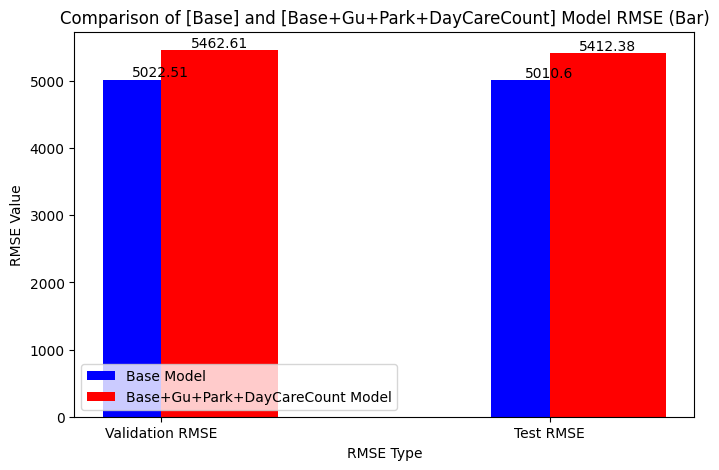

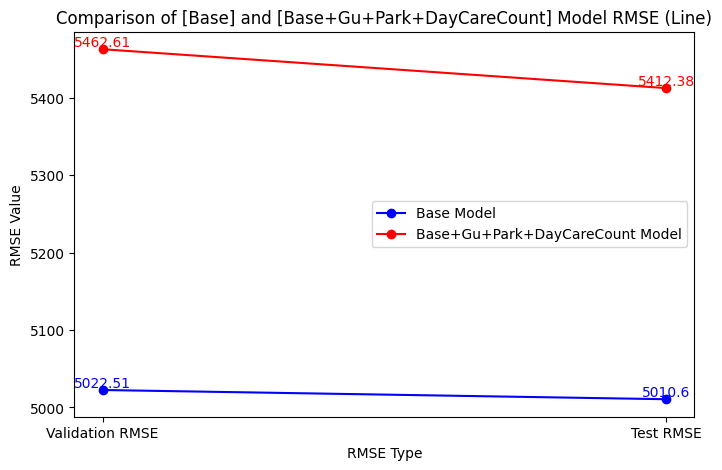

In [8]:
plot_show_all(val_rmse, test_rmse, "Base+Gu+Park+DayCareCount")